In [2]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
train = pd.concat([train,(pd.get_dummies(train['Vehicle_Age']))],axis=1)
train.drop('Vehicle_Age', axis=1, inplace=True)

In [8]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years
0,1,Male,44,1,28.0,0,Yes,40454.0,26.0,217,1,0,0,1
1,2,Male,76,1,3.0,0,No,33536.0,26.0,183,0,1,0,0
2,3,Male,47,1,28.0,0,Yes,38294.0,26.0,27,1,0,0,1
3,4,Male,21,1,11.0,1,No,28619.0,152.0,203,0,0,1,0
4,5,Female,29,1,41.0,1,No,27496.0,152.0,39,0,0,1,0


C:\Users\ecroque\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

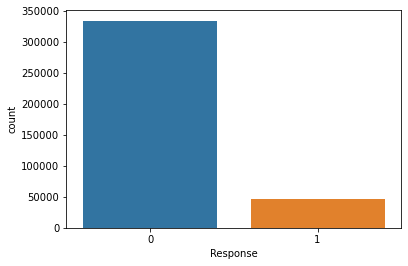

In [9]:
snb.countplot(train['Response'])

In [10]:
train= pd.concat([train,(pd.get_dummies(train['Gender']))],axis=1)
train.drop('Gender', axis=1, inplace= True)
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,Female,Male
0,1,44,1,28.0,0,Yes,40454.0,26.0,217,1,0,0,1,0,1
1,2,76,1,3.0,0,No,33536.0,26.0,183,0,1,0,0,0,1
2,3,47,1,28.0,0,Yes,38294.0,26.0,27,1,0,0,1,0,1
3,4,21,1,11.0,1,No,28619.0,152.0,203,0,0,1,0,0,1
4,5,29,1,41.0,1,No,27496.0,152.0,39,0,0,1,0,1,0


In [11]:
train=pd.concat([train,(pd.get_dummies(train['Vehicle_Damage']))], axis=1)
train.drop('Vehicle_Damage', inplace = True, axis = 1)
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,Female,Male,No,Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,0,1,0,1,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,1,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,0,1,0,1,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,0,1,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,1,0,1,0


In [12]:
train.drop('Male', axis=1, inplace = True)
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,Female,No,Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,0,1,0,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,0,1,0,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,1,1,0


In [13]:
train.rename(columns={'Yes': 'Vehicle_Damage'}, inplace =True)
train.drop('No', axis= 1, inplace= True)

In [14]:
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,Female,Vehicle_Damage
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,0,1,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,0,1,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,0,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,1,0


C:\Users\ecroque\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Driving_License', ylabel='count'>

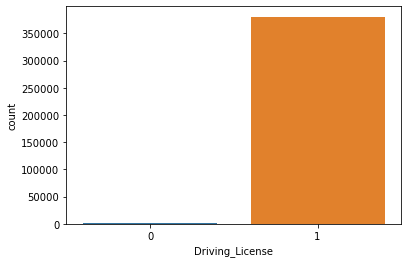

In [15]:
snb.countplot(train['Driving_License'])

In [16]:
train[train['Driving_License']==0]


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,Female,Vehicle_Damage
563,564,69,0,33.0,0,39730.0,26.0,53,0,1,0,0,0,1
1061,1062,71,0,3.0,0,25323.0,26.0,179,0,1,0,0,0,0
1761,1762,58,0,28.0,0,53047.0,122.0,214,0,1,0,0,1,1
1990,1991,66,0,8.0,0,48063.0,25.0,231,0,1,0,0,0,0
2365,2366,52,0,45.0,1,33283.0,26.0,152,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379869,379870,65,0,8.0,0,42230.0,26.0,65,0,0,0,1,0,1
380088,380089,67,0,16.0,0,28195.0,124.0,122,0,0,0,1,0,1
380537,380538,57,0,28.0,0,48647.0,122.0,144,0,1,0,0,0,1
380599,380600,67,0,11.0,1,36953.0,26.0,135,0,1,0,0,0,0


C:\Users\ecroque\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

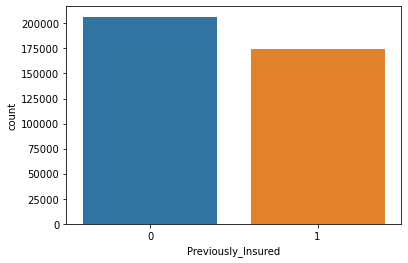

In [17]:
snb.countplot(train['Previously_Insured'])

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

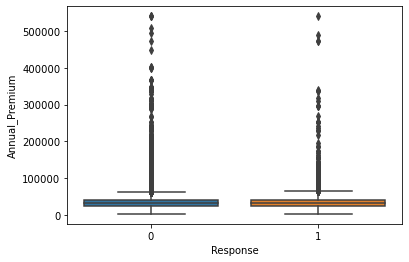

In [18]:
snb.boxplot(data=train, x='Response', y='Annual_Premium')

<AxesSubplot:>

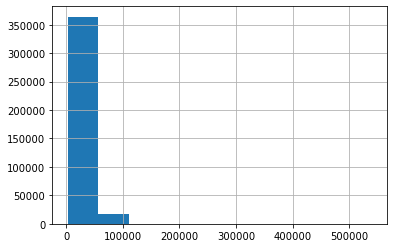

In [19]:
train['Annual_Premium'].hist()

In [20]:
train = train[train['Annual_Premium']<=100000]

<AxesSubplot:>

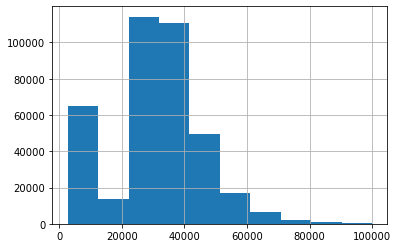

In [21]:
train['Annual_Premium'].hist()

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

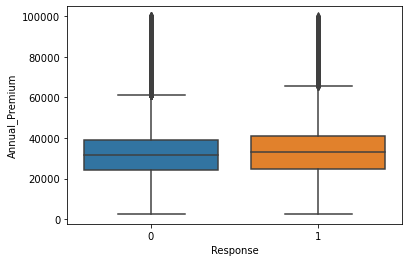

In [22]:
snb.boxplot(data=train, x='Response', y='Annual_Premium')

<AxesSubplot:xlabel='Response', ylabel='Policy_Sales_Channel'>

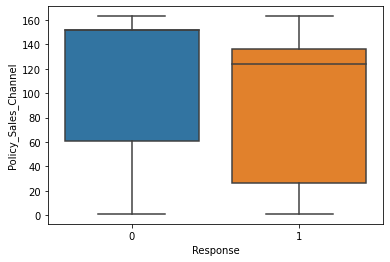

In [23]:
snb.boxplot(data=train, x='Response', y='Policy_Sales_Channel')

<AxesSubplot:xlabel='Response', ylabel='Vintage'>

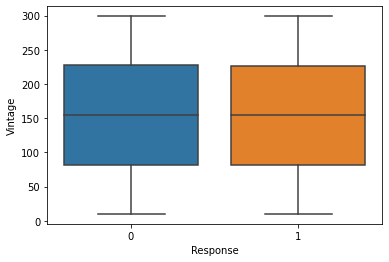

In [24]:
snb.boxplot(data=train, x='Response', y='Vintage')

<AxesSubplot:xlabel='Response', ylabel='Previously_Insured'>

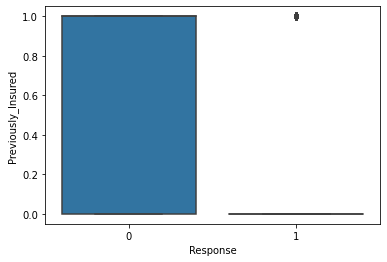

In [25]:
snb.boxplot(data=train, x='Response', y='Previously_Insured')

C:\Users\ecroque\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ecroque\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

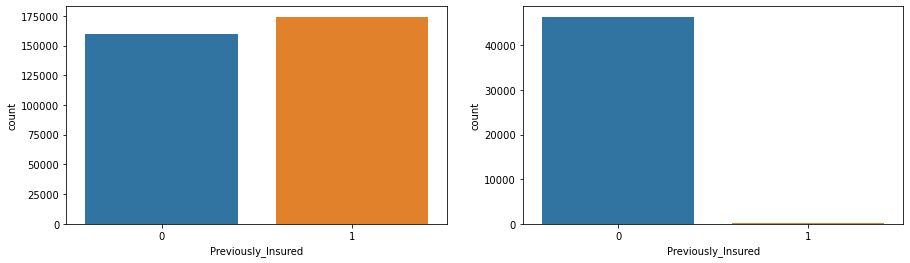

In [26]:
fig,ax= plt.subplots(nrows = 1 , ncols=2, figsize = (15,4))
snb.countplot(train[train['Response']==0]['Previously_Insured'], ax=ax[0])
snb.countplot(train[train['Response']==1]['Previously_Insured'], ax=ax[1])

C:\Users\ecroque\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

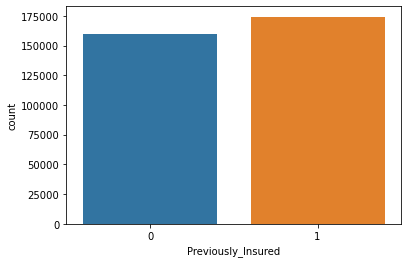

In [27]:
snb.countplot(train[train['Response']==0]['Previously_Insured'])

<AxesSubplot:xlabel='Response', ylabel='Region_Code'>

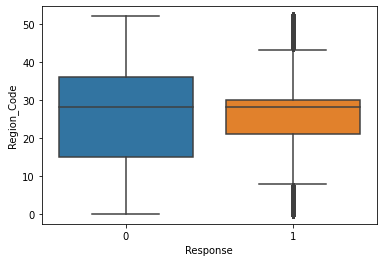

In [28]:
snb.boxplot(data= train, x='Response', y='Region_Code')

<AxesSubplot:xlabel='Response', ylabel='Age'>

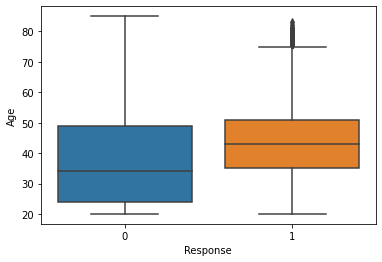

In [29]:
snb.boxplot(data= train, x='Response', y= 'Age')

C:\Users\ecroque\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

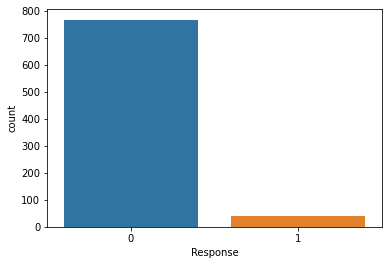

In [30]:
snb.countplot(train[train['Driving_License']==0]['Response'])

<AxesSubplot:>

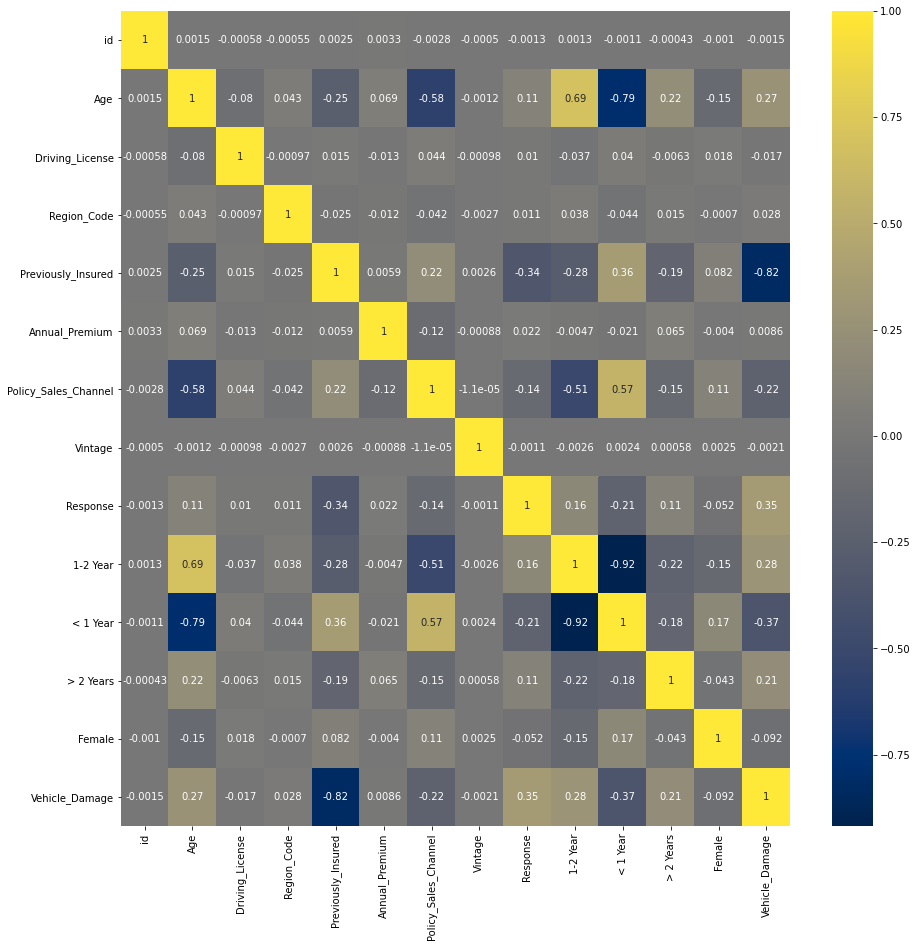

In [31]:
plt.figure(figsize=(15,15))
snb.heatmap(train.corr(),cmap='cividis', annot=True)

In [32]:
train.drop('Driving_License', inplace= True, axis =1)
train.drop('Region_Code', inplace= True, axis=1)
train.drop('Vintage', inplace=True, axis =1)

In [33]:
train.head()

,id,Age,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response,1-2 Year,< 1 Year,> 2 Years,Female,Vehicle_Damage
0,1,44,0,40454.0,26.0,1,0,0,1,0,1
1,2,76,0,33536.0,26.0,0,1,0,0,0,0
2,3,47,0,38294.0,26.0,1,0,0,1,0,1
3,4,21,1,28619.0,152.0,0,0,1,0,0,0
4,5,29,1,27496.0,152.0,0,0,1,0,1,0


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDClassifier, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder

In [35]:
train.head()

,id,Age,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response,1-2 Year,< 1 Year,> 2 Years,Female,Vehicle_Damage
0,1,44,0,40454.0,26.0,1,0,0,1,0,1
1,2,76,0,33536.0,26.0,0,1,0,0,0,0
2,3,47,0,38294.0,26.0,1,0,0,1,0,1
3,4,21,1,28619.0,152.0,0,0,1,0,0,0
4,5,29,1,27496.0,152.0,0,0,1,0,1,0


In [36]:
X = train.drop('Response', axis = 1)
y = train['Response']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state= 0)

In [40]:
clf = LogisticRegression()

In [41]:
clf.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_predicted = clf.predict(X_test)

In [44]:
score = clf.score(X_test, y_test)

In [45]:
score

0.879264332759278